///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////                    

                                KRISSAAN AMEN ALLAH - M2 -TRIED                   

                                amenallahkrissane10@gmail.com                   

                            amen-allah.krissaan@telecom-sudparis.eu 
                            
                                        Lab 1- DEEP RN          

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# TP 1 - Algorithme de r√©tro-propagation de l‚Äôerreur

**L‚Äôobjectif de cette premi√®re s√©ance de travaux pratiques est de vous faire impl√©menter par vous m√™me l‚Äôapprentissage de r√©seaux de neurones simples.**
Cettre prise en main sera tr√®s formatrice pour utiliser des mod√®les plus √©volu√©s, et comprendre le fonctionnement des libaries (comme Keras) o√π l‚Äôapprentissage est automatis√©.

On va travailler avec la base de donn√©es image MNIST, constitu√©e d‚Äôimages de
caract√®res manuscrits (60000 images en apprentissage, 10000 en test).

Voici un bout de code pour r√©cup√©rer les donn√©es  :

In [1]:
#! pip install keras
#! pip install tensorflow

In [2]:
from keras.datasets import mnist
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


## Exercice 0 : visualisation de quelques images de la base
<dl style='margin: 20px 0;'>
<dt>Nous commencerons par afficher les 200 premi√®res images de la base d‚Äôapprentissage.</dt>
<dd>
    
- √âcrire un script qui r√©cup√®re les donn√©es avec le code pr√©c√©dent.  
- Compl√©ter pour permettre l‚Äôaffichage demand√© en utilisant le code suivant :  

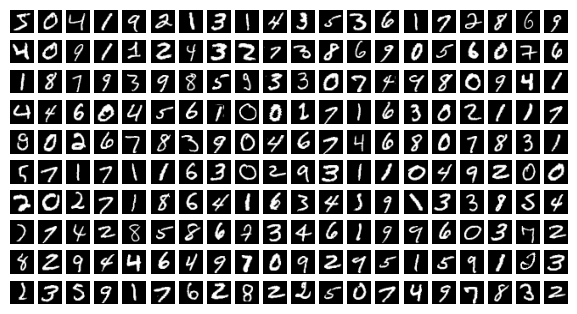

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.figure(figsize=(7.195, 3.841), dpi=100)
for i in range(200):
  plt.subplot(10,20,i+1)
  plt.imshow(X_train[i,:].reshape([28,28]), cmap='gray')
  plt.axis('off')
plt.show()

---
## Question :

Quel est l‚Äôespace dans lequel se trouvent les images ? Quel est sa taille ?

            l'espace c'est l'ensemble du Train et la taille c'est 28 * 28 



---

## Exercice 1 : R√©gression Logistique

### Mod√®le de pr√©diction


<dl style='margin: 20px 0;'>
<dt>On va d‚Äôabord commencer par cr√©er un mod√®le de classification lin√©aire populaire, la r√©gression logistique.</dt>
<dd>
Ce mod√®le correspond √† un r√©seau de neurones √† une seule couche, qui va projeter le vecteur d‚Äôentr√©e $ \mathbf{x_i} $ pour une image MNIST
(taille $ 28^2=784 $) avec un vecteur de de param√®tres $ \mathbf{w_{c}} $ pour chaque classe (plus un biais $ b_c $).
Pour correspondre √† la matrice des donn√©es de l‚Äôexercice pr√©c√©dent, on consid√®re que chaque exemple $ \mathbf{x_i} $ est un vecteur ligne - taille (1,784).
En regroupant l‚Äôensemble des jeux de param√®tres $ \mathbf{w_{c}} $ pour les 10 classes dans une matrice $ \mathbf{W} $ (taille $ 784\times 10 $),
et les biais dans un vecteur $ \mathbf{b} $, on obtient un vecteur
$ \mathbf{\hat{s_i}} =\mathbf{x_i}  \mathbf{W}  + \mathbf{b} $ de taille (1,10).
Une fonction d‚Äôactivation de type soft-max sur $ \mathbf{\hat{y_i}} = $ `softmax` $ (\mathbf{s_i}) $ permet d‚Äôobtenir le vecteur de sortie pr√©dit par le mod√®le $ \mathbf{\hat{y_i}} $
- de taille (1,10) - qui repr√©sente la probabilit√© *a posteriori*
$ p(\mathbf{\hat{y_i}} | \mathbf{x_i}) $ pour chacune des 10 classes:

</dd>

</dl>


<a id='equation-softmax'></a>
$$
p(\hat{y_{c,i}} | \mathbf{x_i}) ) = \frac{e^{\langle \mathbf{x_i} ; \mathbf{w_{c}}\rangle + b_{c}}}{\sum\limits_{c'=1}^{10} e^{\langle \mathbf{x_i} ; \mathbf{w_{c'}}\rangle + b_{c'}}} \tag{1}
$$

Le sch√©ma ci-dessous illustre le mod√®le de r√©gression logistique avec un r√©seau de neurones.

<img src="http://cedric.cnam.fr/~thomen/cours/US330X/_images/LR.png" style="height:150px;" align="center">

- Quel est le nombre de param√®tres du mod√®le ? Justifier le calcul.  

                (784+1)*10 = 7850

### Formulation du probl√®me d‚Äôapprentissage

> Afin d‚Äôentra√Æner le r√©seau de neurones, on va comparer, pour chaque exemple d‚Äôapprentissage, la sortie pr√©dite $ \mathbf{\hat{y_i}} $ par le r√©seau
(√©quation [(1)](#equation-softmax)) pour l‚Äôimage $ \mathbf{x_i} $, avec la sortie
r√©elle $ \mathbf{y_i^*} $ issue de la supervision qui correspond √† la cat√©gorie de l‚Äôimage $ \mathbf{x_i} $:
on utilisera en encodage de type ¬´¬†one-hot¬†¬ª pour $ \mathbf{y_i^*} $, *i.e.* :



<a id='equation-one-hot'></a>
$$
y_{c,i}^* =
 \begin{cases}
   1 & \text{si c correspond √† l'indice de la classe de } \mathbf{x_i}  \\
   0 & \text{sinon}
 \end{cases} \tag{2}
$$

Pour mesurer l‚Äôerreur de pr√©diction, on utilisera une fonction de co√ªt de type entropie crois√©e (¬´¬†cross-entropy¬†¬ª) entre $ \mathbf{\hat{y_i}} $ et $ \mathbf{y_i^*} $
(l‚Äôentropie crois√©e est li√© √† la divergence de Kullback-Leiber, qui mesure une dissimilarit√© entre distributions de probabilit√©s) :
$ \mathcal{L}(\mathbf{\hat{y_i}}, \mathbf{y_i^*}) = -\sum\limits_{c=1}^{10} y_{c,i}^* log(\hat{y}_{c,i}) = - log(\hat{y}_{c^*,i}) $, o√π $ c^* $ correspond √† l‚Äôindice de la classe donn√© par la supervision pour l‚Äôimage $ \mathbf{x_i} $.

La fonction de co√ªt finale consistera √† moyenner l‚Äôentropie crois√©e sur l‚Äôensemble de la base d‚Äôapprentissage $ \mathcal{D} $ consistu√©e de $ N=60000 $ images :


<a id='equation-ce'></a>
$$
\mathcal{L}_{\mathbf{W},\mathbf{b}}(\mathcal{D})  = - \frac{1}{N}\sum_{i=1}^{N} log(\hat{y}_{c^*,i}) \tag{3}
$$

---

### Question :

La fonction de co√ªt de l‚ÄôEq. [(3)](#equation-ce) est-elle convexe par rapports aux param√®tres $ \mathbf{W} $, $ \mathbf{b} $ du mod√®le ? Avec un pas de gradient bien choisi, peut-on assurer la convergence vers le minimum  global de la solution ?

                Somme de fonction convexe est convexe.

---

### Optimisation du mod√®le

Afin d‚Äôoptimiser les param√®tres $ \mathbf{W} $ et $ \mathbf{b} $ du mod√®le de r√©gression logistique par descente de gradient, on va utiliser la r√®gle des d√©riv√©es cha√Æn√©es (chain rule) :

$$
\frac{\partial \mathcal{L}}{\partial \mathbf{W}} =  \frac{1}{N}\sum_{i=1}^{N} \frac{\partial \mathcal{L}}{\partial \mathbf{\hat{y_i}}}  \frac{\partial \mathbf{\hat{y_i}}}{\partial \mathbf{s_i}} \frac{\partial \mathbf{s_i}}{\partial \mathbf{W}}
$$

$$
\frac{\partial \mathcal{L}}{\partial \mathbf{b}} =  \frac{1}{N}\sum_{i=1}^{N} \frac{\partial \mathcal{L}}{\partial \mathbf{\hat{y_i}}}  \frac{\partial \mathbf{\hat{y_i}}}{\partial \mathbf{s_i}} \frac{\partial \mathbf{s_i}}{\partial \mathbf{b}}
$$

### Montrer que :

$$
\frac{\partial \mathcal{L}}{\partial \mathbf{s_i}} = \mathbf{\delta^y_i}  =\frac{\partial \mathcal{L}}{\partial \mathbf{\hat{y_i}}}  \frac{\partial \mathbf{\hat{y_i}}}{\partial \mathbf{s_i}} = \mathbf{\hat{y_i}} - \mathbf{y_i^*}
$$

### En d√©duire que les gradients de $ \mathcal{L} $ par rapport aux param√®tres du mod√®le s‚Äô√©crivent :


<a id='equation-gradientw-LR'></a>
$$
\frac{\partial \mathcal{L}}{\partial \mathbf{W}} = \frac{1}{N} \mathbf{X}^T (\mathbf{\hat{Y}} - \mathbf{Y^*}) = \frac{1}{N} \mathbf{X}^T \mathbf{\Delta^y} \tag{4}
$$


<a id='equation-gradientb-LR'></a>
$$
\frac{\partial \mathcal{L}}{\partial \mathbf{b}} = \frac{1}{N}\sum_{i=1}^{N}(\mathbf{\hat{y_i}} - \mathbf{y_i^*}) \tag{5}
$$

O√π  $ \mathbf{X} $ est la matrice des donn√©es (taille $ 60000\times 784 $), $ \mathbf{\hat{Y}} $ est la matrice des labels pr√©dits sur l‚Äôensemble de la base d‚Äôapprentissage (taille $ 60000\times 10 $)
et $ \mathbf{Y^*} $ est la matrice des labels donn√©e issue de la supervision (¬´¬†ground truth¬†¬ª, taille $ 60000\times 10 $), et $ \mathbf{\Delta^y}=\mathbf{\hat{Y}}-\mathbf{Y^*} $.

### Impl√©mentation de l‚Äôapprentissage

Les gradients aux √©quations [(4)](#equation-gradientw-LR) et [(5)](#equation-gradientb-LR) s‚Äô√©crivent sous forme ¬´¬†vectorielle¬†¬ª, ce qui va rendre les calculs efficaces avec des librairies de calculs scientifique comme `numpy`. Apr√®s calcul du gradient, les param√®tres
seront mis √† jour de la mani√®re suivante :


<a id='equation-gradientupdatew'></a>
$$
\mathbf{W}^{(t+1)} = \mathbf{W}^{(t)} - \eta \frac{\partial \mathcal{L}}{\partial \mathbf{W}} \tag{6}
$$


<a id='equation-gradientupdateb'></a>
$$
\mathbf{b}^{(t+1)} = \mathbf{b}^{(t)} - \eta \frac{\partial \mathcal{L}}{\partial \mathbf{b}} \tag{7}
$$

o√π $ \eta $ est le pas de gradient (learning rate).

Pour impl√©menter l‚Äôalgorithme d‚Äôapprentissage, on utuilisera une descente de gradient stochastique, c‚Äôest √† dire que les gradients aux √©quations [(4)](#equation-gradientw-LR) et [(5)](#equation-gradientb-LR)  ne seront pas calcul√©s
sur l‚Äôensemble des $ N=60000 $ images d‚Äôapprentissage, mais sur un sous ensemble appel√© **batch**. Cette technique permet une mise √† jour des param√®tres plus fr√©quente qu‚Äôavec une descente de gradient classique, et une convergence
plus rapide (au d√©triment d‚Äôun calcul de gradient approxim√©).

**On demande de mettre en place un script** `exo1.py` **qui impl√©mente l‚Äôalogorithme de r√©gression logistique sur la base MNIST.**

Apr√®s avoir charg√© les donn√©es (exercice 0), on utilisera le code suivant pour g√©n√©rer des labels au format
0-1 encoding - √©quation [(2)](#equation-one-hot).

In [4]:
from tensorflow.keras.utils import to_categorical
K=10
# convert class vectors to binary class matrices
Y_train = to_categorical(y_train, K)
Y_test = to_categorical(y_test, K)

**On pourra utiliser la fonction suivante pour calculer la fonction softmax sur chaque √©l√©ment de de la matrice de la projection lin√©raire (taille ùë°ùëè√ó10) :**

In [5]:
def softmax(X):
    # Input matrix X of size Nbxd - Output matrix of same size
    E = np.exp(X)
    return (E.T / np.sum(E,axis=1)).T

## On mettra alors en place un code dont le squellette est donn√© ci-dessous :

In [6]:
import numpy as np

# Assume X_train and K are defined before this point

N = X_train.shape[0]
d = X_train.shape[1]

# Initialize weights and biases
W = np.zeros((d, K))
b = np.zeros((1, K))

numEp = 20  # Number of epochs for gradient descent
eta = 1e-1  # Learning rate
batch_size = 100
nb_batches = int(float(N) / batch_size)

def forward(x,w,b):
  Z=np.dot(x,w)+b
  return softmax(Z)

for epoch in range(numEp):
    for ex in range(nb_batches):
        # FORWARD PASS: compute prediction with current params for examples in batch
        batch_X = X_train[ex * batch_size: (ex + 1) * batch_size, :]
        batch_Y = Y_train[ex * batch_size: (ex + 1) * batch_size, :]

        scores = np.dot(batch_X, W) + b
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # BACKWARD PASS:
        # 1) compute gradients for W and b
        dscores = probs - batch_Y
        gradW = np.dot(batch_X.T, dscores)/batch_size
        gradb = np.sum(dscores, axis=0, keepdims=True)/batch_size

        # 2) update W and b parameters with gradient descent
        W -= eta * gradW
        b -= eta * gradb

# After the training loop, W and b will contain the learned parameters.


Pour compl√©ter ce code, vous devez :

- Mettre en place une fonction `forward(batch, W, b)` qui va calculer la pr√©diction pour un batch de donn√©es. La fonction `forward` sera appel√©e pour chaque it√©ration de la double boucle pr√©c√©dente.  


> - Si on consid√®re un batch des donn√©es de taille $ tb\times 784 $, les param√®tres $ \mathbf{W} $ (taille $ 784\times 10 $) et $ \mathbf{b} $ (taille $ 1\times 10 $), la fonction `forward` renvoie la pr√©diction $ \mathbf{\hat{Y}} $ sur le batch (taille $ tb\times 10 $).    

- Compl√©ter le code pour la passe backward, consistant √†  :
  - Calculer les gradient comme indiqu√© aux √©quations [(4)](#equation-gradientw-LR) et [(5)](#equation-gradientb-LR).
  - Mettre √† jour les param√®tres par descente de gradient comme indiqu√© aux √©quations [(6)](#equation-gradientupdatew) et [(7)](#equation-gradientupdateb).  


Enfin vous pouvez utiliser la fonction `accuracy(W, b, images, labels)` fournie pour calculer le taux de bonne reconnaissance du mod√®le. Ceci permettra de mesurer l‚Äô√©volution des performances au cours des √©poques de l‚Äôalgorithme d‚Äôapprentissage, et sur la base de test une fois le mod√®le appris.

### Vous devez obtenir un score de l‚Äôordre de 92% sur la base de test pour ce mod√®le de r√©gression logistique.

In [7]:
def accuracy(W, b, images, labels):
  pred = forward(images, W,b )
  return np.where( pred.argmax(axis=1) != labels.argmax(axis=1) , 0.,1.).mean()*100.0

# Supposons que vous ayez d√©j√† d√©fini les variables W, b, X_test, et Y_test
# o√π X_test est votre ensemble de test et Y_test sont les √©tiquettes correspondantes.

# Utilisez la fonction accuracy
acc = accuracy(W, b, X_train, Y_train)
acc1 = accuracy(W, b, X_test, Y_test)

# Imprimez le r√©sultat
print("Accuracy: {:.2f}%".format(acc))
print("Accuracy: {:.2f}%".format(acc1))

Accuracy: 92.50%
Accuracy: 92.24%


## Exercice 2 : Perceptron multi-couches (MLP)

### L‚Äôobjectif de ce second exercice est d‚Äô√©tendre le mod√®le de r√©gression logistique afin de mettre en place des mod√®les de pr√©dictions plus riches.
**En particulier, on va s‚Äôint√©resser aux Perceptron multi-couches (Multi-Layer Percpetron, MLP)**. Contrairement √† la r√©gression logistique qui se limite √† des s√©parateurs lin√©aires,
le Perceptron permet l‚Äôapprentissage de fronti√®res de d√©cisions non lin√©aires, et constituent des approximateurs universels de fonctions.

L‚Äôobjectif de la s√©ance de travaux pratiques est de mettre en place le code pour effectuer des pr√©dictions et entra√Æner un Perceptron √† une couche cach√©e.

### Pr√©diction avec un Perceptron (Forward)

L‚Äôarchitecture du perpcetron √† une couche cach√©e est montr√©e √† la figure ci-dessous.

<img src="http://cedric.cnam.fr/~thomen/cours/US330X/_images/MLP.png" style="height:250px;" align="center">

Si on consid√®re les donn√©es de la base MNIST, chaque image est repr√©sent√©e par un vecteur de taille $ 28^2=784 $.
Le perpcetron va effecteur les diff√©rentes √©tape de transformation pour produire la pr√©diction finale, *i.e.* la cat√©gorie s√©mantique de l‚Äôimage :

- Une √©tape de projection lin√©aire, qui va projeter chaque image sur un vecteur de taille $ (1,L) $, *e.g.* $ L=100 $. En consid√©rant chaque exemple $ \mathbf{x_i} $ est un vecteur ligne - taille $ (1,784) $ - la projection lin√©aire peut √™tre repr√©sent√©e par la matrice $ \mathbf{W^h} $ (taille $ (784, L) $), et le vecteur de biais $ \mathbf{b^h} $ (taille $ (1, L) $) : $ \mathbf{\hat{u_i}} =\mathbf{x_i}  \mathbf{W^h}  + \mathbf{b^h} $.  


> - Une √©tape de non lin√©arit√©, *e.g.* de type sigmo√Øde :  $ \forall j \in  \left\lbrace 1; L \right\rbrace  ~ h_{i,j} = \frac{1}{1+exp(-u_{i,j})} $  



- Une seconde √©tape de projection lin√©aire, qui va projeter le vecteur latent de taille $ (1,L) $ sur un vecteur de taille $ (1,K)=10 $ (nombre de classes). Cette op√©ration de projection lin√©aire sera repr√©sent√©e par la matrice $ \mathbf{W^y} $ (taille $ (L, K) $), et le vecteur de biais $ \mathbf{b^y} $ (taille $ (1, K) $) : $ \mathbf{\hat{v_i}} =\mathbf{h_i}  \mathbf{W^y}  + \mathbf{b^y} $.  


> - Une √©tape de non lin√©arit√© de type soft-max vue la semaine pr√©c√©dente pour la r√©gression logistique : $ \forall j \in  \left\lbrace 1; K \right\rbrace  ~ y_{i,j} = \frac{exp(v_{i,j})}{\sum\limits_{i=1}^K exp(v_{i,k})} $  



**On demande de mettre en place un script** `mlp.py` **qui impl√©mente l‚Äôalogorithme du Percpetron sur la base MNIST.**


<dl style='margin: 20px 0;'>
<dt>L‚Äôalgorithme reprendra le squelette du code de la r√©gression logistique. Pour adapter ce code pour le Perceptron pour la partie pr√©diction,  vous devez :</dt>
<dd>
- Modifier la fonction de pr√©diction, afin disposer la fonction `forward(batch, Wh, bh, Wy, by)` qui reverra √† la fois la pr√©diction pour le batch ainsi que la matrice des couches latentes.  


> - Si on consid√®re un batch des donn√©es de taille $ t_b\times 784 $, les param√®tres $ \mathbf{W^h} $ (taille $ 784\times L $), $ \mathbf{b^h} $ (taille $ 1\times L $), $ \mathbf{W^y} $ (taille $ L\times K $) et $ \mathbf{b^y} $ (taille $ 1\times K $), la fonction `forward` renvoie la pr√©diction $ \mathbf{\hat{Y}} $ sur le batch (taille $ t_b\times K $) et la matrice de variables latentes (taille $ t_b\times L $).  



</dd>

</dl>

In [8]:
# Function forward pour le MLP
def forward(batch, Wh, bh, Wy, by):
    latent = 0
    res = 0
    return latent, res

In [9]:
# Calcul de l'accuracy avec le MLP
def accuracy(batch, labels,Wh, bh, Wy, by):
   latent, pred = forward(batch, Wh, bh, Wy, by)
   return np.where( pred.argmax(axis=1) != labels.argmax(axis=1) , 0.,1.).mean()*100.0

### Apprentissage du Perceptron (Backward)

Afin d‚Äôentra√Æner le Perceptron, on va utiliser l‚Äôalgorithme de r√©tro-propagation de l‚Äôerreur. On rappelle que pour chaque batch d‚Äôexemples, l‚Äôalgorithme va effectuer une passe `forward` (Exercice 1), permettant de calculer la pr√©diction du r√©seau.
Une fonction de co√ªt (ici l‚Äôentropie crois√©e) entre la sortie pr√©dite et la la sortie donn√©e par la supervision va permettre de calculer le gradient de l‚Äôerreur par rapport √† tous les param√®tres param√®tres du mod√®le, *i.e.* $ \mathbf{W^y} $ (taille $ (L, K) $), $ \mathbf{b^y} $ (taille $ (1, K) $), $ \mathbf{W^h} $ (taille $ (784, L) $), et $ \mathbf{b^h} $ (taille $ (1, L) $).

On rappelle les √©quation des gradients, effectu√©es depuis le haut vers le bas du r√©seau :

1. Mise √† jour de $ \mathbf{W^y} $ et $ \mathbf{b^y} $ :  


$$
\frac{\partial \mathcal{L}}{\partial \mathbf{v_i}} = \mathbf{\delta^y_i} = \mathbf{\hat{y_i}} - \mathbf{y_i^*}
$$


<a id='equation-gradientw'></a>
$$
\frac{\partial \mathcal{L}}{\partial \mathbf{W^y}} = \frac{1}{t_b}\mathbf{H}^T (\mathbf{\hat{Y}} - \mathbf{Y^*}) = \frac{1}{t_b} \mathbf{H}^T \mathbf{\Delta^y} \tag{8}
$$


<a id='equation-gradientb'></a>
$$
\frac{\partial \mathcal{L}}{\partial \mathbf{b^y}} = \frac{1}{t_b}\sum_{i=1}^{t_b}(\mathbf{\hat{y_i}} - \mathbf{y_i^*}) \tag{9}
$$

O√π  $ \mathbf{H} $ est la matrice des couches cach√©es sur le batch (taille $ t_b\times L $), $ \mathbf{\hat{Y}} $ est la matrice des labels pr√©dits sur l‚Äôensemble de la base d‚Äôapprentissage (taille $ t_b\times K $)
et $ \mathbf{Y^*} $ est la matrice des labels donn√©e issue de la supervision (¬´¬†ground truth¬†¬ª, taille $ t_b\times K $), et $ \mathbf{\Delta^y}=\mathbf{\hat{Y}}-\mathbf{Y^*} $.

1. Mise √† jour de $ \mathbf{W^h} $ et $ \mathbf{b^h} $ :  


$$
\frac{\partial \mathcal{L}}{\partial \mathbf{u_i}} = \mathbf{\delta^h_i} = \mathbf{\delta^y_i} \mathbf{W^{y}}^T   \odot \sigma^{'}(\mathbf{u_i}) = \mathbf{\delta^y_i} \mathbf{W^{y}}^T \odot (\mathbf{h_i} \odot (1-\mathbf{h_i}))
$$

$$
\frac{\partial \mathcal{L}}{\partial \mathbf{W^h}} =  \frac{1}{t_b} \mathbf{X}^T \mathbf{\Delta^h}
$$

$$
\frac{\partial \mathcal{L}}{\partial \mathbf{b^h}} = \frac{1}{t_b}\sum_{i=1}^{t_b}(\delta^h_i)
$$

O√π  $ \mathbf{X} $ est la matrice des donn√©es sur le batch (taille $ t_b\times 784 $), et $ \mathbf{\Delta^h} $ est la matrice des $ \delta^h_i $ sur le batch (taille $ t_b\times L $).

## Adapter la partie backward de l‚Äôalgorithme pour entra√Æner le Perceptron.
On Choisira un pas de gradient $ \eta=1.0 $ et 100 √©poques.

In [10]:
# tester les performances methode Mohamed Boukaf

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def forward(batch, Wh, bh, Wy, by):
    """ Entr√©es:
        - batch: un batch de n images de MNIST au format vecteur (n, 784)
        - Wh: une matrice de poids entr√©e -> couche cach√©e
        - bh: un vecteur de biais pour la couche cach√©e
        - Wy: une matrice de poids couche cach√©e -> sortie
        - by: un vecteur de biais pour la sortie

        Renvoie:
        - Y_pred: pr√©dictions de sortie
        - H: activations de la couche cach√©e
    """
    # √Ä compl√©ter
    H = sigmoid(batch @ Wh + bh)
    Y_pred=softmax(H@Wy+by)
    return Y_pred, H


def backward(Y_pred, Y, X, H,Wy):
    """ Entr√©es:
        - Y_pred: batch de vecteur des pr√©dictions (one-hot)
        - Y: batch de vecteur des √©tiquettes (one-hot)
        - X: batch d'images (au format vectoriel (n, 784))
        - H: matrice des activations cach√©es

        Renvoie:
        - gradWy: gradient de l'erreur (entropie crois√©e) par rapport √† Wy
        - gradby: gradient de l'erreur (entropie crois√©e) par rapport √† by
        - gradWh: gradient de l'erreur (entropie crois√©e) par rapport √† Wh
        - gradbh: gradient de l'erreur (entropie crois√©e) par rapport √† bh
    """
    n = len(X)

    # Calcul du gradient par rapport √† Wy et by
    grad_output = Y_pred - Y
    gradWy = np.dot(H.T, grad_output)
    gradby = np.sum(grad_output, axis=0, keepdims=True)

    # Calcul du gradient par rapport √† Wh et bh
    grad_hidden = np.dot(grad_output, Wy.T) * (H * (1 - H))
    gradWh = np.dot(X.T, grad_hidden)
    gradbh = np.sum(grad_hidden, axis=0, keepdims=True)

    # Normalisation des gradients par le nombre d'exemples
    gradWy /= n
    gradby /= n
    gradWh /= n
    gradbh /= n

    return gradWy, gradby, gradWh, gradbh


def accuracy_mlp( images, labels,wh, bh, wy, by):
    pred, h = forward(images, wh, bh, wy, by)
    return np.where(pred.argmax(axis=1) != labels.argmax(axis=1), 0., 1.).mean()*100.0

def acc(X_batch,Y_batch,wh,bh,wy,by):
    pred,h=forward(X_batch,wh,bh,wy,by)
    predicted_labels = np.argmax(pred, axis=1)
    true_labels = np.argmax(Y_batch, axis=1)
    accuracy = np.mean(predicted_labels==true_labels) * 100.0
    return accuracy


import numpy as np
N, d = X_train.shape # N exemples, dimension d
hidden_size = 100 # Nombre de neurones de la couche cach√©e
# Initialisation des poids et des biais
from sklearn.metrics import log_loss



Wy = np.zeros((hidden_size, K))
Wh = np.zeros((d, hidden_size))
by = np.zeros((1, K))
bh = np.zeros((1, hidden_size))

sigma_normal = 1/np.sqrt(784)
K = 10
L = 100
Wy = np.random.normal(0, sigma_normal,(L,K))
by = np.random.normal(0, sigma_normal,(1,K))
Wh = np.random.normal(0, sigma_normal,(d,L))
bh = np.random.normal(0, sigma_normal,(1,L))
eta=0.1


n_epochs = 100 # Nombre d'epochs de la descente de gradient
eta = 1e-1 # Learning rate (pas d'apprentissage)
batch_size = 100 # Taille du lot
n_batches = int(float(N) / batch_size)

# Allocation des matrices pour stocker les valeurs des gradients
gradWy = np.zeros((hidden_size, K))
gradWh = np.zeros((d, hidden_size))
gradby = np.zeros((1, K))
gradbh = np.zeros((1, hidden_size))
accuracy=[]
loss_train=[]
loss_test=[]

for epoch in range(n_epochs):
    for batch_idx in range(n_batches):
        X_batch = X_train[batch_idx * batch_size:(batch_idx + 1) * batch_size]
        Y_batch = Y_train[batch_idx * batch_size:(batch_idx + 1) * batch_size]

        # ********* √Ä compl√©ter **********
        # FORWARD PASS : calculer la pr√©diction y √† partir des param√®tres courants pour les images du batch
        Y_pred,H=forward(X_batch,Wh,bh,Wy,by)
        # BACKWARD PASS :
        gradWy, gradby, gradWh, gradbh=backward(Y_pred, Y_batch, X_batch, H,Wy)
        Wy=Wy-eta*gradWy
        by=by-eta*gradby
        Wh=Wh-eta*gradWh
        bh=bh-eta*gradbh


        # 1) calculer les gradients de l'erreur par rapport √† W et b
        # 2) mettre √† jour les param√®tres W et b selon la descente de gradient
    logloss_train = log_loss(Y_batch, Y_pred)
    pred_test,h=forward(X_test,Wh,bh,Wy,by)
    logloss_test=log_loss(Y_test,pred_test)
    loss_train.append(logloss_train)
    loss_test.append(logloss_test)
    accur=acc(X_test,Y_test,Wh,bh,Wy,by)
    accuracy.append(accur)
    #print(f'======= Epoch {epoch}/{n_epochs}')
    print(f'======= Epoch {epoch}/{n_epochs} ======= Accuracy {accur}')



======= Epoch 0/100 ======= Accuracy 85.84
======= Epoch 1/100 ======= Accuracy 89.61
======= Epoch 2/100 ======= Accuracy 90.64
======= Epoch 3/100 ======= Accuracy 91.42
======= Epoch 4/100 ======= Accuracy 91.91
======= Epoch 5/100 ======= Accuracy 92.27
======= Epoch 6/100 ======= Accuracy 92.69
======= Epoch 7/100 ======= Accuracy 92.97
======= Epoch 8/100 ======= Accuracy 93.16
======= Epoch 9/100 ======= Accuracy 93.47999999999999
======= Epoch 10/100 ======= Accuracy 93.71000000000001
======= Epoch 11/100 ======= Accuracy 93.93
======= Epoch 12/100 ======= Accuracy 94.14
======= Epoch 13/100 ======= Accuracy 94.28999999999999
======= Epoch 14/100 ======= Accuracy 94.54
======= Epoch 15/100 ======= Accuracy 94.67999999999999
======= Epoch 16/100 ======= Accuracy 94.78
======= Epoch 17/100 ======= Accuracy 94.88
======= Epoch 18/100 ======= Accuracy 94.99
======= Epoch 19/100 ======= Accuracy 95.1
======= Epoch 20/100 ======= Accuracy 95.17
======= Epoch 21/100 ======= Accuracy 9

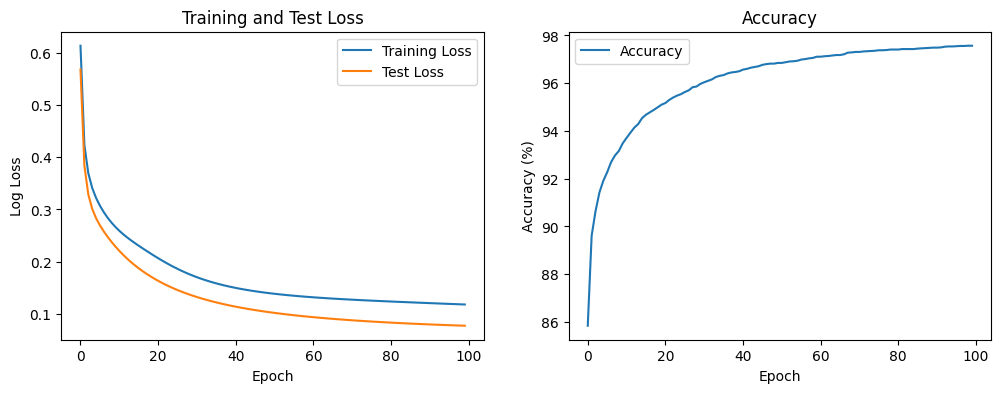

In [11]:
import matplotlib.pyplot as plt


# Plotting
epochs = range(n_epochs)

# Plot the training and test losses
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_train, label='Training Loss')
plt.plot(epochs, loss_test, label='Test Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.legend()

# Plot the accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, label='Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()


---
# Observation : 

### Graphique de gauche : **Loss d'entra√Ænement et de test**
- **Observation** : 
  - Les courbes de perte pour l'entra√Ænement et le test diminuent rapidement au cours des premi√®res √©poques, puis continuent √† diminuer progressivement, atteignant des valeurs tr√®s basses (< 0,1).
  - La courbe de perte de test est toujours en dessous de la courbe de perte d'entra√Ænement.

- **Analyse** : 
  - Le mod√®le apprend efficacement, comme en t√©moigne la diminution r√©guli√®re des pertes.
  - La perte de test inf√©rieure √† celle de l'entra√Ænement peut indiquer une certaine sous-r√©gularisation ou des donn√©es d'entra√Ænement moins complexes par rapport aux donn√©es de test.
  - L'absence de divergence significative entre les courbes indique une bonne g√©n√©ralisation.


### Graphique de droite : **Pr√©cision (Accuracy)**
- **Observation** : 
  - La pr√©cision augmente rapidement et atteint un plateau autour de 98 % apr√®s environ 50 √©poques.
  - La courbe est stable avec tr√®s peu de fluctuations.

- **Analyse** :
  - Une pr√©cision √©lev√©e (98 %) sugg√®re que le mod√®le est bien adapt√© √† la t√¢che.
  - Le plateau indique que le mod√®le a atteint sa performance maximale avec cette architecture et ces donn√©es.
  - Une pr√©cision aussi √©lev√©e pourrait √™tre le signe d'un sur-apprentissage (overfitting) si les donn√©es sont trop sp√©cifiques ou insuffisantes.



---

In [12]:
'''
# tester les performances avec initialisation des matrices des poids seulement a zero
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def forward(batch, Wh, bh, Wy, by):
    """ Entr√©es:
        - batch: un batch de n images de MNIST au format vecteur (n, 784)
        - Wh: une matrice de poids entr√©e -> couche cach√©e
        - bh: un vecteur de biais pour la couche cach√©e
        - Wy: une matrice de poids couche cach√©e -> sortie
        - by: un vecteur de biais pour la sortie

        Renvoie:
        - Y_pred: pr√©dictions de sortie
        - H: activations de la couche cach√©e
    """
    # √Ä compl√©ter
    H = sigmoid(batch @ Wh + bh)
    Y_pred=softmax(H@Wy+by)
    return Y_pred, H


def backward(Y_pred, Y, X, H,Wy):
    """ Entr√©es:
        - Y_pred: batch de vecteur des pr√©dictions (one-hot)
        - Y: batch de vecteur des √©tiquettes (one-hot)
        - X: batch d'images (au format vectoriel (n, 784))
        - H: matrice des activations cach√©es

        Renvoie:
        - gradWy: gradient de l'erreur (entropie crois√©e) par rapport √† Wy
        - gradby: gradient de l'erreur (entropie crois√©e) par rapport √† by
        - gradWh: gradient de l'erreur (entropie crois√©e) par rapport √† Wh
        - gradbh: gradient de l'erreur (entropie crois√©e) par rapport √† bh
    """
    n = len(X)

    # Calcul du gradient par rapport √† Wy et by
    grad_output = Y_pred - Y
    gradWy = np.dot(H.T, grad_output)
    gradby = np.sum(grad_output, axis=0, keepdims=True)

    # Calcul du gradient par rapport √† Wh et bh
    grad_hidden = np.dot(grad_output, Wy.T) * (H * (1 - H))
    gradWh = np.dot(X.T, grad_hidden)
    gradbh = np.sum(grad_hidden, axis=0, keepdims=True)

    # Normalisation des gradients par le nombre d'exemples
    gradWy /= n
    gradby /= n
    gradWh /= n
    gradbh /= n

    return gradWy, gradby, gradWh, gradbh


def accuracy_mlp( images, labels,wh, bh, wy, by):
    pred, h = forward(images, wh, bh, wy, by)
    return np.where(pred.argmax(axis=1) != labels.argmax(axis=1), 0., 1.).mean()*100.0

def acc(X_batch,Y_batch,wh,bh,wy,by):
    pred,h=forward(X_batch,wh,bh,wy,by)
    predicted_labels = np.argmax(pred, axis=1)
    true_labels = np.argmax(Y_batch, axis=1)
    accuracy = np.mean(predicted_labels==true_labels) * 100.0
    return accuracy


import numpy as np
N, d = X_train.shape # N exemples, dimension d
hidden_size = 100 # Nombre de neurones de la couche cach√©e
# Initialisation des poids et des biais
from sklearn.metrics import log_loss



Wy = np.zeros((hidden_size, K))
Wh = np.zeros((d, hidden_size))
by = np.zeros((1, K))
bh = np.zeros((1, hidden_size))

sigma_normal = 1/np.sqrt(784)
K = 10
L = 100

by = np.random.normal(0, sigma_normal,(1,K))
bh = np.random.normal(0, sigma_normal,(1,L))
eta=0.1


n_epochs = 100 # Nombre d'epochs de la descente de gradient
eta = 1e-1 # Learning rate (pas d'apprentissage)
batch_size = 100 # Taille du lot
n_batches = int(float(N) / batch_size)

# Allocation des matrices pour stocker les valeurs des gradients
gradWy = np.zeros((hidden_size, K))
gradWh = np.zeros((d, hidden_size))
gradby = np.zeros((1, K))
gradbh = np.zeros((1, hidden_size))
accuracy=[]
loss_train=[]
loss_test=[]

for epoch in range(n_epochs):
    for batch_idx in range(n_batches):
        X_batch = X_train[batch_idx * batch_size:(batch_idx + 1) * batch_size]
        Y_batch = Y_train[batch_idx * batch_size:(batch_idx + 1) * batch_size]

        # ********* √Ä compl√©ter **********
        # FORWARD PASS : calculer la pr√©diction y √† partir des param√®tres courants pour les images du batch
        Y_pred,H=forward(X_batch,Wh,bh,Wy,by)
        # BACKWARD PASS :
        gradWy, gradby, gradWh, gradbh=backward(Y_pred, Y_batch, X_batch, H,Wy)
        Wy=Wy-eta*gradWy
        by=by-eta*gradby
        Wh=Wh-eta*gradWh
        bh=bh-eta*gradbh


        # 1) calculer les gradients de l'erreur par rapport √† W et b
        # 2) mettre √† jour les param√®tres W et b selon la descente de gradient
    logloss_train = log_loss(Y_batch, Y_pred)
    pred_test,h=forward(X_test,Wh,bh,Wy,by)
    logloss_test=log_loss(Y_test,pred_test)
    loss_train.append(logloss_train)
    loss_test.append(logloss_test)
    accur=acc(X_test,Y_test,Wh,bh,Wy,by)
    accuracy.append(accur)
    #print(f'======= Epoch {epoch}/{n_epochs}')
    print(f'======= Epoch {epoch}/{n_epochs} ======= Accuracy {accur}')

'''

'\n# tester les performances avec initialisation des matrices des poids seulement a zero\ndef sigmoid(x):\n    return 1 / (1 + np.exp(-x))\n\n\ndef forward(batch, Wh, bh, Wy, by):\n    """ Entr√©es:\n        - batch: un batch de n images de MNIST au format vecteur (n, 784)\n        - Wh: une matrice de poids entr√©e -> couche cach√©e\n        - bh: un vecteur de biais pour la couche cach√©e\n        - Wy: une matrice de poids couche cach√©e -> sortie\n        - by: un vecteur de biais pour la sortie\n\n        Renvoie:\n        - Y_pred: pr√©dictions de sortie\n        - H: activations de la couche cach√©e\n    """\n    # √Ä compl√©ter\n    H = sigmoid(batch @ Wh + bh)\n    Y_pred=softmax(H@Wy+by)\n    return Y_pred, H\n\n\ndef backward(Y_pred, Y, X, H,Wy):\n    """ Entr√©es:\n        - Y_pred: batch de vecteur des pr√©dictions (one-hot)\n        - Y: batch de vecteur des √©tiquettes (one-hot)\n        - X: batch d\'images (au format vectoriel (n, 784))\n        - H: matrice des activa

## Questions :

- La fonction de co√ªt de l‚ÄôEq. [(3)](tpDeepLearning1.ipynb#equation-ce) est-elle convexe par rapport aux param√®tres $ \mathbf{W} $, $ \mathbf{b} $ du mod√®le ? Avec un pas de gradient bien choisi, peut-on assurer la convergence vers le minimum global de la solution ? 

            La fonction de co√ªt pour un MLP est non convexe en raison des fonctions d'activation non lin√©aires. La convergence vers un minimum global n'est pas garantie, mais la descente de gradient peut trouver un bon minimum local.


- Tester en initialisant les matrices √† 0 comme pour la r√©gression logistique. Quelles performances obtenez-vous ? Que peut-on en conclure ?  




        L'initialisation des poids √† 0 entra√Æne une sym√©trie dans les gradients, ce qui fait que tous les neurones d'une couche apprennent les m√™mes caract√©ristiques. Cela conduit √† de mauvaises performances.






- Vous testerez deux autres initialisations : une qui initialise les poids avec une loi normale de moyenne nulle et d‚Äô√©cart type √† fixer, *e.g.* $ 10^-1 $, et une autre connue sous le nom de Xavier [[GB10]](#glorot10understandingthe), qui divise la valeur de la gaussienne par $ \sqrt{ni} $, o√π $ ni $ est le nombre de neurone dans la couche d‚Äôentr√©e.  
- √âvaluer les performances du mod√®le. **Vous devez obtenir un score de l‚Äôordre de 98% sur la base de test pour ce r√©seau de neurones √† une couche cach√©e.**  


<a id='glorot10understandingthe'></a>
\[GB10\] Xavier Glorot and Yoshua Bengio. Understanding the difficulty of training deep feedforward neural networks. In *In Proceedings of the International Conference on Artificial Intelligence and Statistics (AISTATS‚Äô10). Society for Artificial Intelligence and Statistics*. 2010.



#Tester les performances avec initialisation de tous les matrices (W et b) a zero

In [13]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def forward(batch, Wh, bh, Wy, by):
    """ Entr√©es:
        - batch: un batch de n images de MNIST au format vecteur (n, 784)
        - Wh: une matrice de poids entr√©e -> couche cach√©e
        - bh: un vecteur de biais pour la couche cach√©e
        - Wy: une matrice de poids couche cach√©e -> sortie
        - by: un vecteur de biais pour la sortie

        Renvoie:
        - Y_pred: pr√©dictions de sortie
        - H: activations de la couche cach√©e
    """
    # √Ä compl√©ter
    H = sigmoid(batch @ Wh + bh)
    Y_pred=softmax(H@Wy+by)
    return Y_pred, H


def backward(Y_pred, Y, X, H,Wy):
    """ Entr√©es:
        - Y_pred: batch de vecteur des pr√©dictions (one-hot)
        - Y: batch de vecteur des √©tiquettes (one-hot)
        - X: batch d'images (au format vectoriel (n, 784))
        - H: matrice des activations cach√©es

        Renvoie:
        - gradWy: gradient de l'erreur (entropie crois√©e) par rapport √† Wy
        - gradby: gradient de l'erreur (entropie crois√©e) par rapport √† by
        - gradWh: gradient de l'erreur (entropie crois√©e) par rapport √† Wh
        - gradbh: gradient de l'erreur (entropie crois√©e) par rapport √† bh
    """
    n = len(X)

    # Calcul du gradient par rapport √† Wy et by
    grad_output = Y_pred - Y
    gradWy = np.dot(H.T, grad_output)
    gradby = np.sum(grad_output, axis=0, keepdims=True)

    # Calcul du gradient par rapport √† Wh et bh
    grad_hidden = np.dot(grad_output, Wy.T) * (H * (1 - H))
    gradWh = np.dot(X.T, grad_hidden)
    gradbh = np.sum(grad_hidden, axis=0, keepdims=True)

    # Normalisation des gradients par le nombre d'exemples
    gradWy /= n
    gradby /= n
    gradWh /= n
    gradbh /= n

    return gradWy, gradby, gradWh, gradbh


def accuracy_mlp( images, labels,wh, bh, wy, by):
    pred, h = forward(images, wh, bh, wy, by)
    return np.where(pred.argmax(axis=1) != labels.argmax(axis=1), 0., 1.).mean()*100.0

def acc(X_batch,Y_batch,wh,bh,wy,by):
    pred,h=forward(X_batch,wh,bh,wy,by)
    predicted_labels = np.argmax(pred, axis=1)
    true_labels = np.argmax(Y_batch, axis=1)
    accuracy = np.mean(predicted_labels==true_labels) * 100.0
    return accuracy


import numpy as np
from sklearn.metrics import log_loss

# Assurez-vous que les donn√©es X_train, Y_train, X_test, Y_test sont d√©j√† charg√©es

N, d = X_train.shape # N exemples, dimension d
K = 10 # Nombre de classes
L = 100 # Nombre de neurones dans la couche cach√©e

# Initialisation des poids et des biais √† z√©ro
Wh = np.zeros((d, L))
bh = np.zeros((1, L))
Wy = np.zeros((L, K))
by = np.zeros((1, K))

eta = 0.1 # Taux d'apprentissage

n_epochs = 100 # Nombre d'epochs
batch_size = 100 # Taille du lot
n_batches = N // batch_size

loss_train = []
loss_test = []
accuracy = []

for epoch in range(n_epochs):
    for batch_idx in range(n_batches):
        # Extraction des lots
        X_batch = X_train[batch_idx * batch_size:(batch_idx + 1) * batch_size]
        Y_batch = Y_train[batch_idx * batch_size:(batch_idx + 1) * batch_size]

        # Forward pass
        Y_pred, H = forward(X_batch, Wh, bh, Wy, by)

        # Backward pass
        gradWy, gradby, gradWh, gradbh = backward(Y_pred, Y_batch, X_batch, H, Wy)

        # Mise √† jour des poids
        Wy -= eta * gradWy
        by -= eta * gradby
        Wh -= eta * gradWh
        bh -= eta * gradbh

    # Calcul et stockage des pertes et de la pr√©cision
    logloss_train = log_loss(Y_batch, Y_pred)
    pred_test, h = forward(X_test, Wh, bh, Wy, by)
    logloss_test = log_loss(Y_test, pred_test)
    accur = accuracy_mlp(X_test, Y_test, Wh, bh, Wy, by)

    loss_train.append(logloss_train)
    loss_test.append(logloss_test)
    accuracy.append(accur)

    print(f'Epoch {epoch+1}/{n_epochs} - Train Loss: {logloss_train:.4f} - Test Loss: {logloss_test:.4f} - Accuracy: {accur:.2f}%')



Epoch 1/100 - Train Loss: 2.3059 - Test Loss: 2.2930 - Accuracy: 11.35%
Epoch 2/100 - Train Loss: 2.1297 - Test Loss: 2.0270 - Accuracy: 24.53%
Epoch 3/100 - Train Loss: 1.9381 - Test Loss: 1.8435 - Accuracy: 29.92%
Epoch 4/100 - Train Loss: 1.8300 - Test Loss: 1.7497 - Accuracy: 32.19%
Epoch 5/100 - Train Loss: 1.7630 - Test Loss: 1.6919 - Accuracy: 33.18%
Epoch 6/100 - Train Loss: 1.7258 - Test Loss: 1.6563 - Accuracy: 33.45%
Epoch 7/100 - Train Loss: 1.7059 - Test Loss: 1.6334 - Accuracy: 34.44%
Epoch 8/100 - Train Loss: 1.6251 - Test Loss: 1.5340 - Accuracy: 39.19%
Epoch 9/100 - Train Loss: 1.2684 - Test Loss: 1.2649 - Accuracy: 49.22%
Epoch 10/100 - Train Loss: 1.1902 - Test Loss: 1.1993 - Accuracy: 52.56%
Epoch 11/100 - Train Loss: 1.1528 - Test Loss: 1.1547 - Accuracy: 55.66%
Epoch 12/100 - Train Loss: 1.1277 - Test Loss: 1.1157 - Accuracy: 58.48%
Epoch 13/100 - Train Loss: 1.1099 - Test Loss: 1.0825 - Accuracy: 60.43%
Epoch 14/100 - Train Loss: 1.0930 - Test Loss: 1.0561 - Accu

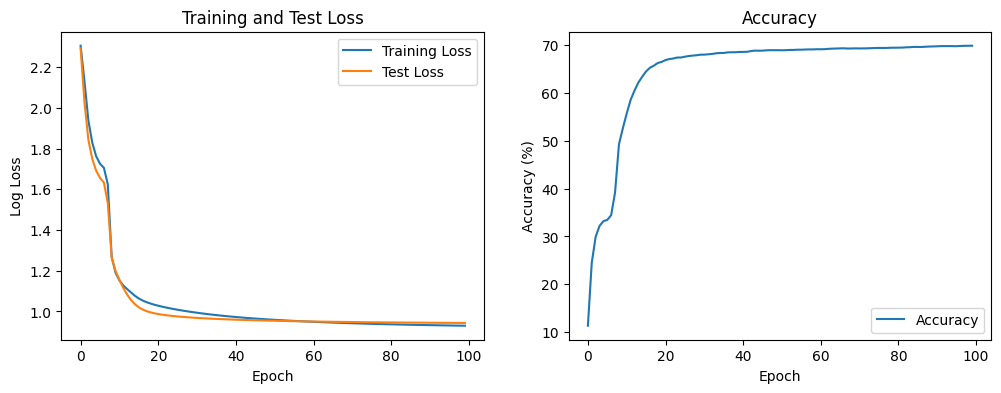

In [14]:
# Plot the training and test losses
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_train, label='Training Loss')
plt.plot(epochs, loss_test, label='Test Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.legend()

# Plot the accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, label='Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()

---
# Observation : 

### Graphique de gauche : **Loss d'entra√Ænement et de test**
- **Observation** : Les courbes de perte (loss) pour l'entra√Ænement et le test diminuent significativement au cours des premi√®res √©poques, puis se stabilisent vers l'√©poque 40‚Äì50.
- **Analyse** :
  - La diminution des pertes indique que le mod√®le apprend efficacement.
  - La proximit√© entre les pertes d'entra√Ænement et de test montre que le mod√®le g√©n√©ralise bien, sans signe √©vident de sur-apprentissage (overfitting).
  - La stagnation des courbes de perte indique que le mod√®le atteint une sorte de limite dans sa capacit√© d'apprentissage pour cette architecture ou ce jeu de donn√©es.

### Graphique de droite : **Pr√©cision (Accuracy)**
- **Observation** : La pr√©cision augmente rapidement pendant les premi√®res √©poques, puis commence √† se stabiliser autour des √©poques 40‚Äì50, atteignant environ 70 %.
- **Analyse** :
  - L'augmentation rapide de la pr√©cision au d√©but montre que le mod√®le apprend efficacement.
  - La stabilisation autour de 70 % indique une limitation potentielle li√©e √† l'architecture, aux donn√©es ou √† la m√©thode d'entra√Ænement.

---

#Tester les performances avec Initialisation des poids avec une loi normale de moyenne nulle et d‚Äô√©cart type √† fixer et qui est  10^-1

In [15]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def forward(batch, Wh, bh, Wy, by):
    """ Entr√©es:
        - batch: un batch de n images de MNIST au format vecteur (n, 784)
        - Wh: une matrice de poids entr√©e -> couche cach√©e
        - bh: un vecteur de biais pour la couche cach√©e
        - Wy: une matrice de poids couche cach√©e -> sortie
        - by: un vecteur de biais pour la sortie

        Renvoie:
        - Y_pred: pr√©dictions de sortie
        - H: activations de la couche cach√©e
    """
    # √Ä compl√©ter
    H = sigmoid(batch @ Wh + bh)
    Y_pred=softmax(H@Wy+by)
    return Y_pred, H


def backward(Y_pred, Y, X, H,Wy):
    """ Entr√©es:
        - Y_pred: batch de vecteur des pr√©dictions (one-hot)
        - Y: batch de vecteur des √©tiquettes (one-hot)
        - X: batch d'images (au format vectoriel (n, 784))
        - H: matrice des activations cach√©es

        Renvoie:
        - gradWy: gradient de l'erreur (entropie crois√©e) par rapport √† Wy
        - gradby: gradient de l'erreur (entropie crois√©e) par rapport √† by
        - gradWh: gradient de l'erreur (entropie crois√©e) par rapport √† Wh
        - gradbh: gradient de l'erreur (entropie crois√©e) par rapport √† bh
    """
    n = len(X)

    # Calcul du gradient par rapport √† Wy et by
    grad_output = Y_pred - Y
    gradWy = np.dot(H.T, grad_output)
    gradby = np.sum(grad_output, axis=0, keepdims=True)

    # Calcul du gradient par rapport √† Wh et bh
    grad_hidden = np.dot(grad_output, Wy.T) * (H * (1 - H))
    gradWh = np.dot(X.T, grad_hidden)
    gradbh = np.sum(grad_hidden, axis=0, keepdims=True)

    # Normalisation des gradients par le nombre d'exemples
    gradWy /= n
    gradby /= n
    gradWh /= n
    gradbh /= n

    return gradWy, gradby, gradWh, gradbh


def accuracy_mlp( images, labels,wh, bh, wy, by):
    pred, h = forward(images, wh, bh, wy, by)
    return np.where(pred.argmax(axis=1) != labels.argmax(axis=1), 0., 1.).mean()*100.0

def acc(X_batch,Y_batch,wh,bh,wy,by):
    pred,h=forward(X_batch,wh,bh,wy,by)
    predicted_labels = np.argmax(pred, axis=1)
    true_labels = np.argmax(Y_batch, axis=1)
    accuracy = np.mean(predicted_labels==true_labels) * 100.0
    return accuracy


import numpy as np
N, d = X_train.shape # N exemples, dimension d
hidden_size = 100 # Nombre de neurones de la couche cach√©e
# Initialisation des poids et des biais
from sklearn.metrics import log_loss


sigma_normal = 0.1
Wy = np.random.randn(hidden_size, K)*sigma_normal
Wh = np.random.randn(d, hidden_size)*sigma_normal
by = np.zeros((1, K))
bh = np.zeros((1, hidden_size))


K = 10
L = 100
eta=0.1


n_epochs = 100 # Nombre d'epochs de la descente de gradient
eta = 1e-1 # Learning rate (pas d'apprentissage)
batch_size = 100 # Taille du lot
n_batches = int(float(N) / batch_size)

# Allocation des matrices pour stocker les valeurs des gradients
gradWy = np.zeros((hidden_size, K))
gradWh = np.zeros((d, hidden_size))
gradby = np.zeros((1, K))
gradbh = np.zeros((1, hidden_size))
accuracy=[]
loss_train=[]
loss_test=[]

for epoch in range(n_epochs):
    for batch_idx in range(n_batches):
        X_batch = X_train[batch_idx * batch_size:(batch_idx + 1) * batch_size]
        Y_batch = Y_train[batch_idx * batch_size:(batch_idx + 1) * batch_size]

        # ********* √Ä compl√©ter **********
        # FORWARD PASS : calculer la pr√©diction y √† partir des param√®tres courants pour les images du batch
        Y_pred,H=forward(X_batch,Wh,bh,Wy,by)
        # BACKWARD PASS :
        gradWy, gradby, gradWh, gradbh=backward(Y_pred, Y_batch, X_batch, H,Wy)
        Wy=Wy-eta*gradWy
        by=by-eta*gradby
        Wh=Wh-eta*gradWh
        bh=bh-eta*gradbh


        # 1) calculer les gradients de l'erreur par rapport √† W et b
        # 2) mettre √† jour les param√®tres W et b selon la descente de gradient
    logloss_train = log_loss(Y_batch, Y_pred)
    pred_test,h=forward(X_test,Wh,bh,Wy,by)
    logloss_test=log_loss(Y_test,pred_test)
    loss_train.append(logloss_train)
    loss_test.append(logloss_test)
    accur=acc(X_test,Y_test,Wh,bh,Wy,by)
    accuracy.append(accur)
    #print(f'======= Epoch {epoch}/{n_epochs}')
    print(f'======= Epoch {epoch}/{n_epochs} ======= Accuracy {accur}')

 

======= Epoch 0/100 ======= Accuracy 87.48
======= Epoch 1/100 ======= Accuracy 89.97
======= Epoch 2/100 ======= Accuracy 91.07
======= Epoch 3/100 ======= Accuracy 91.63
======= Epoch 4/100 ======= Accuracy 92.02
======= Epoch 5/100 ======= Accuracy 92.47
======= Epoch 6/100 ======= Accuracy 92.86
======= Epoch 7/100 ======= Accuracy 93.23
======= Epoch 8/100 ======= Accuracy 93.53
======= Epoch 9/100 ======= Accuracy 93.74
======= Epoch 10/100 ======= Accuracy 93.94
======= Epoch 11/100 ======= Accuracy 94.12
======= Epoch 12/100 ======= Accuracy 94.26
======= Epoch 13/100 ======= Accuracy 94.52000000000001
======= Epoch 14/100 ======= Accuracy 94.65
======= Epoch 15/100 ======= Accuracy 94.77
======= Epoch 16/100 ======= Accuracy 94.91000000000001
======= Epoch 17/100 ======= Accuracy 95.02000000000001
======= Epoch 18/100 ======= Accuracy 95.19999999999999
======= Epoch 19/100 ======= Accuracy 95.22
======= Epoch 20/100 ======= Accuracy 95.34
======= Epoch 21/100 ======= Accuracy 

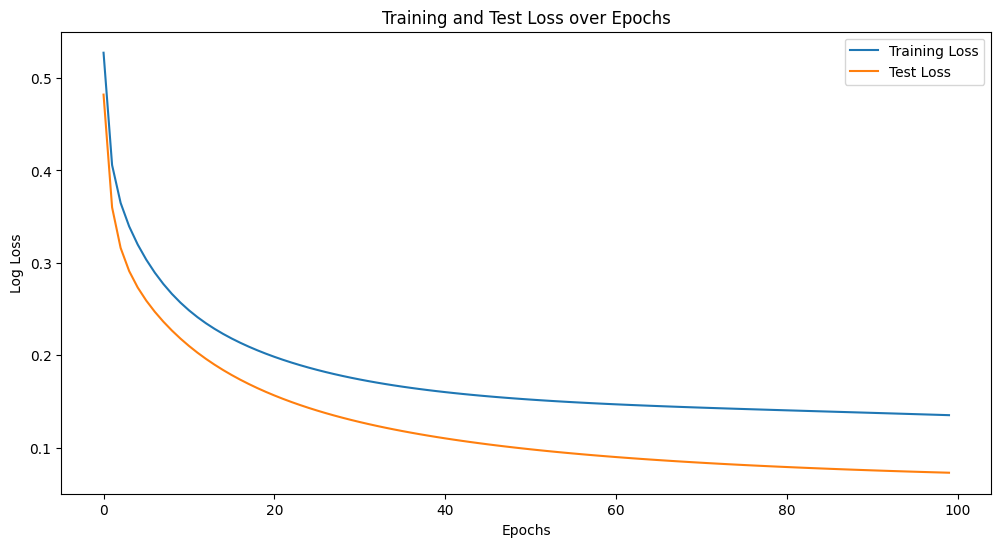

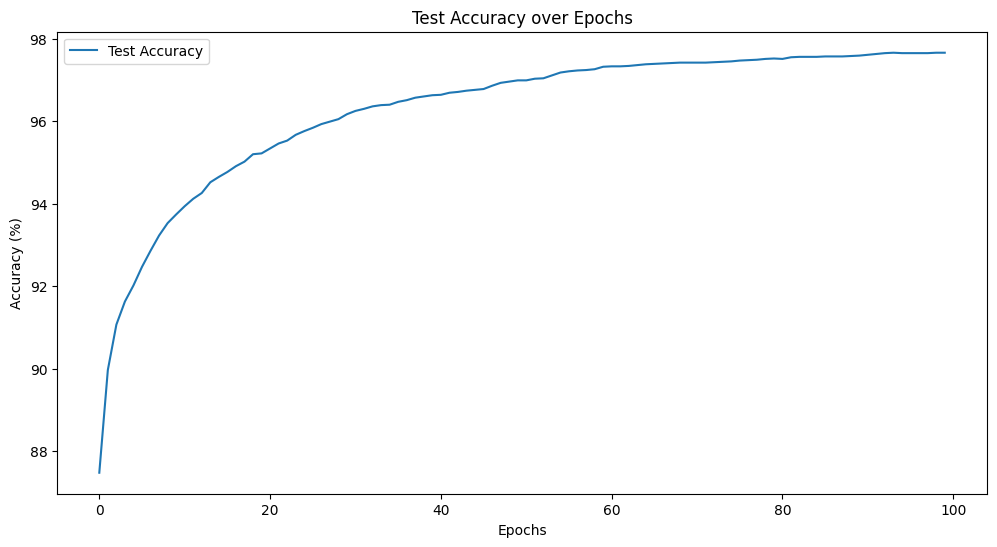

In [16]:
# Plot the training and test loss
plt.figure(figsize=(12, 6))
plt.plot(range(n_epochs), loss_train, label='Training Loss')
plt.plot(range(n_epochs), loss_test, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('Training and Test Loss over Epochs')
plt.legend()
plt.show()
# Plot the accuracy
plt.figure(figsize=(12, 6))
plt.plot(range(n_epochs), accuracy, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy over Epochs')
plt.legend()
plt.show()

#Tester les performances avec Initialisation des poids selon Xavier/Glorot

In [17]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def forward(batch, Wh, bh, Wy, by):
    """ Entr√©es:
        - batch: un batch de n images de MNIST au format vecteur (n, 784)
        - Wh: une matrice de poids entr√©e -> couche cach√©e
        - bh: un vecteur de biais pour la couche cach√©e
        - Wy: une matrice de poids couche cach√©e -> sortie
        - by: un vecteur de biais pour la sortie

        Renvoie:
        - Y_pred: pr√©dictions de sortie
        - H: activations de la couche cach√©e
    """
    # √Ä compl√©ter
    H = sigmoid(batch @ Wh + bh)
    Y_pred=softmax(H@Wy+by)
    return Y_pred, H


def backward(Y_pred, Y, X, H,Wy):
    """ Entr√©es:
        - Y_pred: batch de vecteur des pr√©dictions (one-hot)
        - Y: batch de vecteur des √©tiquettes (one-hot)
        - X: batch d'images (au format vectoriel (n, 784))
        - H: matrice des activations cach√©es

        Renvoie:
        - gradWy: gradient de l'erreur (entropie crois√©e) par rapport √† Wy
        - gradby: gradient de l'erreur (entropie crois√©e) par rapport √† by
        - gradWh: gradient de l'erreur (entropie crois√©e) par rapport √† Wh
        - gradbh: gradient de l'erreur (entropie crois√©e) par rapport √† bh
    """
    n = len(X)

    # Calcul du gradient par rapport √† Wy et by
    grad_output = Y_pred - Y
    gradWy = np.dot(H.T, grad_output)
    gradby = np.sum(grad_output, axis=0, keepdims=True)

    # Calcul du gradient par rapport √† Wh et bh
    grad_hidden = np.dot(grad_output, Wy.T) * (H * (1 - H))
    gradWh = np.dot(X.T, grad_hidden)
    gradbh = np.sum(grad_hidden, axis=0, keepdims=True)

    # Normalisation des gradients par le nombre d'exemples
    gradWy /= n
    gradby /= n
    gradWh /= n
    gradbh /= n

    return gradWy, gradby, gradWh, gradbh


def accuracy_mlp( images, labels,wh, bh, wy, by):
    pred, h = forward(images, wh, bh, wy, by)
    return np.where(pred.argmax(axis=1) != labels.argmax(axis=1), 0., 1.).mean()*100.0

def acc(X_batch,Y_batch,wh,bh,wy,by):
    pred,h=forward(X_batch,wh,bh,wy,by)
    predicted_labels = np.argmax(pred, axis=1)
    true_labels = np.argmax(Y_batch, axis=1)
    accuracy = np.mean(predicted_labels==true_labels) * 100.0
    return accuracy


import numpy as np
N, d = X_train.shape # N exemples, dimension d
K = 10 # Nombre de classes
L = 100 # Nombre de neurones dans la couche cach√©e

# Initialisation des poids avec l'initialisation de Xavier/Glorot
sqrt_6_over_sqrt_in_out = np.sqrt(6) / np.sqrt(d + L) # Xavier initialization range
Wh = np.random.uniform(-sqrt_6_over_sqrt_in_out, sqrt_6_over_sqrt_in_out, (d, L))
Wy = np.random.uniform(-sqrt_6_over_sqrt_in_out, sqrt_6_over_sqrt_in_out, (L, K))

# Les biais sont toujours initialis√©s √† z√©ro
bh = np.zeros((1, L))
by = np.zeros((1, K))

eta = 1e-1 # Learning rate

n_epochs = 100 # Nombre d'epochs
batch_size = 100 # Taille du lot
n_batches = N // batch_size

accuracy = []
loss_train = []
loss_test = []

for epoch in range(n_epochs):
    for batch_idx in range(n_batches):
        X_batch = X_train[batch_idx * batch_size:(batch_idx + 1) * batch_size]
        Y_batch = Y_train[batch_idx * batch_size:(batch_idx + 1) * batch_size]


        Y_pred,H=forward(X_batch,Wh,bh,Wy,by)
        # BACKWARD PASS :
        gradWy, gradby, gradWh, gradbh=backward(Y_pred, Y_batch, X_batch, H,Wy)
        Wy=Wy-eta*gradWy
        by=by-eta*gradby
        Wh=Wh-eta*gradWh
        bh=bh-eta*gradbh


        # 1) calculer les gradients de l'erreur par rapport √† W et b
        # 2) mettre √† jour les param√®tres W et b selon la descente de gradient
    logloss_train = log_loss(Y_batch, Y_pred)
    pred_test,h=forward(X_test,Wh,bh,Wy,by)
    logloss_test=log_loss(Y_test,pred_test)
    loss_train.append(logloss_train)
    loss_test.append(logloss_test)
    accur=acc(X_test,Y_test,Wh,bh,Wy,by)
    accuracy.append(accur)
    #print(f'======= Epoch {epoch}/{n_epochs}')
    print(f'======= Epoch {epoch}/{n_epochs} ======= Accuracy {accur}')

    

======= Epoch 0/100 ======= Accuracy 86.53999999999999
======= Epoch 1/100 ======= Accuracy 89.75999999999999
======= Epoch 2/100 ======= Accuracy 90.75999999999999
======= Epoch 3/100 ======= Accuracy 91.51
======= Epoch 4/100 ======= Accuracy 91.94
======= Epoch 5/100 ======= Accuracy 92.36
======= Epoch 6/100 ======= Accuracy 92.67999999999999
======= Epoch 7/100 ======= Accuracy 92.97
======= Epoch 8/100 ======= Accuracy 93.27
======= Epoch 9/100 ======= Accuracy 93.53
======= Epoch 10/100 ======= Accuracy 93.74
======= Epoch 11/100 ======= Accuracy 94.01
======= Epoch 12/100 ======= Accuracy 94.16
======= Epoch 13/100 ======= Accuracy 94.27
======= Epoch 14/100 ======= Accuracy 94.42
======= Epoch 15/100 ======= Accuracy 94.6
======= Epoch 16/100 ======= Accuracy 94.76
======= Epoch 17/100 ======= Accuracy 94.95
======= Epoch 18/100 ======= Accuracy 95.08
======= Epoch 19/100 ======= Accuracy 95.17999999999999
======= Epoch 20/100 ======= Accuracy 95.32000000000001
======= Epoch 2

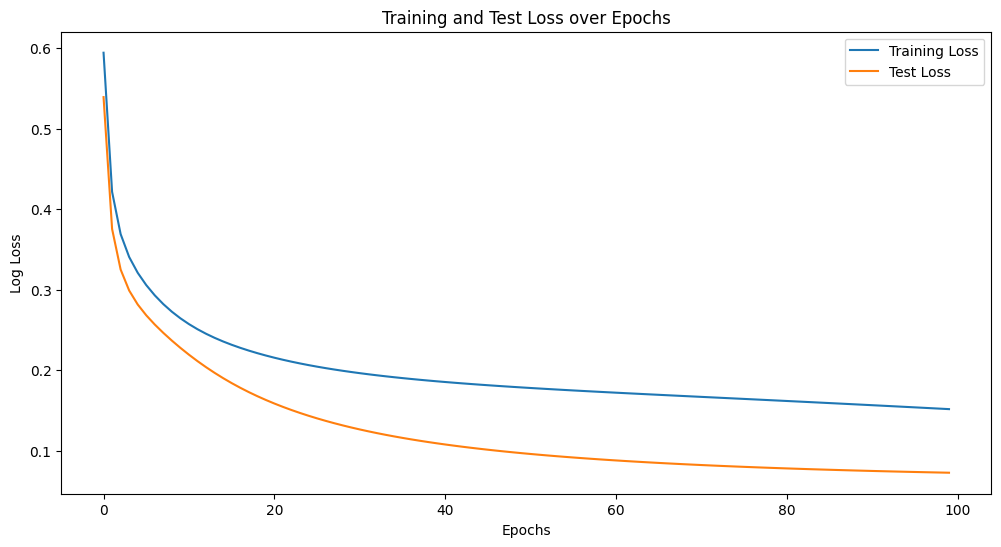

In [18]:
# Plot the training and test loss
plt.figure(figsize=(12, 6))
plt.plot(range(n_epochs), loss_train, label='Training Loss')
plt.plot(range(n_epochs), loss_test, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('Training and Test Loss over Epochs')
plt.legend()
plt.show()
# Plot the accuracy
plt.figure(figsize=(12, 6))
plt.plot(range(n_epochs), accuracy, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy over Epochs')
plt.legend()
plt.show()

#Tester les performances avec Initialisation des poids selon une distribution normale selon Xavier/Glorot

In [19]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def forward(batch, Wh, bh, Wy, by):
    """ Entr√©es:
        - batch: un batch de n images de MNIST au format vecteur (n, 784)
        - Wh: une matrice de poids entr√©e -> couche cach√©e
        - bh: un vecteur de biais pour la couche cach√©e
        - Wy: une matrice de poids couche cach√©e -> sortie
        - by: un vecteur de biais pour la sortie

        Renvoie:
        - Y_pred: pr√©dictions de sortie
        - H: activations de la couche cach√©e
    """
    # √Ä compl√©ter
    H = sigmoid(batch @ Wh + bh)
    Y_pred=softmax(H@Wy+by)
    return Y_pred, H


def backward(Y_pred, Y, X, H,Wy):
    """ Entr√©es:
        - Y_pred: batch de vecteur des pr√©dictions (one-hot)
        - Y: batch de vecteur des √©tiquettes (one-hot)
        - X: batch d'images (au format vectoriel (n, 784))
        - H: matrice des activations cach√©es

        Renvoie:
        - gradWy: gradient de l'erreur (entropie crois√©e) par rapport √† Wy
        - gradby: gradient de l'erreur (entropie crois√©e) par rapport √† by
        - gradWh: gradient de l'erreur (entropie crois√©e) par rapport √† Wh
        - gradbh: gradient de l'erreur (entropie crois√©e) par rapport √† bh
    """
    n = len(X)

    # Calcul du gradient par rapport √† Wy et by
    grad_output = Y_pred - Y
    gradWy = np.dot(H.T, grad_output)
    gradby = np.sum(grad_output, axis=0, keepdims=True)

    # Calcul du gradient par rapport √† Wh et bh
    grad_hidden = np.dot(grad_output, Wy.T) * (H * (1 - H))
    gradWh = np.dot(X.T, grad_hidden)
    gradbh = np.sum(grad_hidden, axis=0, keepdims=True)

    # Normalisation des gradients par le nombre d'exemples
    gradWy /= n
    gradby /= n
    gradWh /= n
    gradbh /= n

    return gradWy, gradby, gradWh, gradbh


def accuracy_mlp( images, labels,wh, bh, wy, by):
    pred, h = forward(images, wh, bh, wy, by)
    return np.where(pred.argmax(axis=1) != labels.argmax(axis=1), 0., 1.).mean()*100.0

def acc(X_batch,Y_batch,wh,bh,wy,by):
    pred,h=forward(X_batch,wh,bh,wy,by)
    predicted_labels = np.argmax(pred, axis=1)
    true_labels = np.argmax(Y_batch, axis=1)
    accuracy = np.mean(predicted_labels==true_labels) * 100.0
    return accuracy


import numpy as np
N, d = X_train.shape # N exemples, dimension d
K = 10 # Nombre de classes
L = 100 # Nombre de neurones dans la couche cach√©e

# Initialisation des poids avec l'initialisation de Xavier/Glorot
std_dev = np.sqrt(2.0 / (d + L)) # Pour une activation sigmo√Øde
Wh = np.random.randn(d, L) * std_dev
Wy = np.random.randn(L, K) * std_dev

# Les biais sont toujours initialis√©s √† z√©ro
bh = np.zeros((1, L))
by = np.zeros((1, K))

eta = 1e-1 # Learning rate

n_epochs = 100 # Nombre d'epochs
batch_size = 100 # Taille du lot
n_batches = N // batch_size

accuracy = []
loss_train = []
loss_test = []

for epoch in range(n_epochs):
    for batch_idx in range(n_batches):
        X_batch = X_train[batch_idx * batch_size:(batch_idx + 1) * batch_size]
        Y_batch = Y_train[batch_idx * batch_size:(batch_idx + 1) * batch_size]

        # ********* √Ä compl√©ter **********
        # FORWARD PASS : calculer la pr√©diction y √† partir des param√®tres courants pour les images du batch
        Y_pred,H=forward(X_batch,Wh,bh,Wy,by)
        # BACKWARD PASS :
        gradWy, gradby, gradWh, gradbh=backward(Y_pred, Y_batch, X_batch, H,Wy)
        Wy=Wy-eta*gradWy
        by=by-eta*gradby
        Wh=Wh-eta*gradWh
        bh=bh-eta*gradbh


        # 1) calculer les gradients de l'erreur par rapport √† W et b
        # 2) mettre √† jour les param√®tres W et b selon la descente de gradient
    logloss_train = log_loss(Y_batch, Y_pred)
    pred_test,h=forward(X_test,Wh,bh,Wy,by)
    logloss_test=log_loss(Y_test,pred_test)
    loss_train.append(logloss_train)
    loss_test.append(logloss_test)
    accur=acc(X_test,Y_test,Wh,bh,Wy,by)
    accuracy.append(accur)
    #print(f'======= Epoch {epoch}/{n_epochs}')
    print(f'======= Epoch {epoch}/{n_epochs} ======= Accuracy {accur}')



======= Epoch 0/100 ======= Accuracy 86.83999999999999
======= Epoch 1/100 ======= Accuracy 89.87
======= Epoch 2/100 ======= Accuracy 90.72
======= Epoch 3/100 ======= Accuracy 91.58
======= Epoch 4/100 ======= Accuracy 91.96
======= Epoch 5/100 ======= Accuracy 92.38
======= Epoch 6/100 ======= Accuracy 92.82000000000001
======= Epoch 7/100 ======= Accuracy 93.13
======= Epoch 8/100 ======= Accuracy 93.43
======= Epoch 9/100 ======= Accuracy 93.67999999999999
======= Epoch 10/100 ======= Accuracy 93.82000000000001
======= Epoch 11/100 ======= Accuracy 94.08
======= Epoch 12/100 ======= Accuracy 94.28
======= Epoch 13/100 ======= Accuracy 94.43
======= Epoch 14/100 ======= Accuracy 94.59
======= Epoch 15/100 ======= Accuracy 94.67
======= Epoch 16/100 ======= Accuracy 94.84
======= Epoch 17/100 ======= Accuracy 95.0
======= Epoch 18/100 ======= Accuracy 95.16
======= Epoch 19/100 ======= Accuracy 95.24000000000001
======= Epoch 20/100 ======= Accuracy 95.30999999999999
======= Epoch 2

In [20]:


# Plot the training and test loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(n_epochs), loss_train, label='Training Loss')
plt.plot(range(n_epochs), loss_test, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
# Plot the accuracy
plt.subplot(1, 2, 2)
plt.plot(range(n_epochs), accuracy, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy')
plt.legend()
plt.show()

---
# Conclusion : 


Ces m√©thodes am√©liorent les performances en brisant la sym√©trie des poids, en maintenant les gradients √† des niveaux appropri√©s pour √©viter les probl√®mes d‚Äôexplosion ou de disparition des gradients, et en facilitant la convergence du r√©seau. Les initialisations al√©atoires, comme celles bas√©es sur une distribution normale ou la m√©thode de Xavier, introduisent une variabilit√© essentielle qui permet √† chaque neurone d‚Äôapprendre diff√©rents aspects des donn√©es.

Par ailleurs, l‚Äôinitialisation Xavier se distingue par son efficacit√© √† maintenir la variance des activations et des gradients √† travers les couches, un aspect crucial pour les architectures profondes. Ces observations soulignent l‚Äôimportance d‚Äôune bonne initialisation des poids pour assurer le bon fonctionnement et des performances optimales des r√©seaux de neurones, notamment dans le cas de structures complexes.

En conclusion, une initialisation ad√©quate des poids est un √©l√©ment cl√© pour favoriser une meilleure g√©n√©ralisation et atteindre des performances √©lev√©es.


---